In [1]:
# print('Pranav')

# LINEAR

In [5]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

import numpy as np
import seaborn as sb

import warnings;
warnings.simplefilter('ignore')

In [110]:
yearly = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Year.csv', sep=';')
yearly.columns = ['Decimal Year','sunspot number','standard deviation','observations','indicator']

In [111]:
yearly.head()

,Decimal Year,sunspot number,standard deviation,observations,indicator
0,1701.5,18.3,-1.0,-1,1
1,1702.5,26.7,-1.0,-1,1
2,1703.5,38.3,-1.0,-1,1
3,1704.5,60.0,-1.0,-1,1
4,1705.5,96.7,-1.0,-1,1


In [112]:
yearly['Decimal Year'] = yearly['Decimal Year'].apply(np.int64)

In [113]:
yearly.head()

,Decimal Year,sunspot number,standard deviation,observations,indicator
0,1701,18.3,-1.0,-1,1
1,1702,26.7,-1.0,-1,1
2,1703,38.3,-1.0,-1,1
3,1704,60.0,-1.0,-1,1
4,1705,96.7,-1.0,-1,1


In [114]:
yearly.dtypes

Decimal Year            int64
sunspot number        float64
standard deviation    float64
observations            int64
indicator               int64
dtype: object

In [115]:
yearly['Decimal Year'] = (yearly['Decimal Year']).astype(str)


yearly.head()

,Decimal Year,sunspot number,standard deviation,observations,indicator
0,1701,18.3,-1.0,-1,1
1,1702,26.7,-1.0,-1,1
2,1703,38.3,-1.0,-1,1
3,1704,60.0,-1.0,-1,1
4,1705,96.7,-1.0,-1,1


In [116]:
yearly['Decimal Year'] = yearly['Decimal Year'] + "-06-01"   # -06-01 because 1701.5

In [117]:
YR = yearly.drop(yearly.index[:40], axis=0)


# 35 model got fit but Cross validation did not

In [118]:
YR.reset_index(drop=True, inplace=True)

In [119]:
YR

,Decimal Year,sunspot number,standard deviation,observations,indicator
0,1741-06-01,66.7,-1.0,-1,1
1,1742-06-01,33.3,-1.0,-1,1
2,1743-06-01,26.7,-1.0,-1,1
3,1744-06-01,8.3,-1.0,-1,1
4,1745-06-01,18.3,-1.0,-1,1
...,...,...,...,...,...
275,2016-06-01,39.8,3.9,9940,1
276,2017-06-01,21.7,2.5,11444,1
277,2018-06-01,7.0,1.1,12611,1
278,2019-06-01,3.6,0.5,12884,1


In [120]:
# YR.dtypes

In [121]:
YR['Decimal Year'] = pd.to_datetime(YR['Decimal Year'], infer_datetime_format=True, format='%Y/%m/%d')

In [122]:
# YR.dtypes

In [123]:
YR

,Decimal Year,sunspot number,standard deviation,observations,indicator
0,1741-06-01,66.7,-1.0,-1,1
1,1742-06-01,33.3,-1.0,-1,1
2,1743-06-01,26.7,-1.0,-1,1
3,1744-06-01,8.3,-1.0,-1,1
4,1745-06-01,18.3,-1.0,-1,1
...,...,...,...,...,...
275,2016-06-01,39.8,3.9,9940,1
276,2017-06-01,21.7,2.5,11444,1
277,2018-06-01,7.0,1.1,12611,1
278,2019-06-01,3.6,0.5,12884,1


In [124]:
YR.drop(['standard deviation','observations','indicator'],axis=1,inplace=True)

In [125]:
YR.columns=['ds','y']

In [126]:
YR

,ds,y
0,1741-06-01,66.7
1,1742-06-01,33.3
2,1743-06-01,26.7
3,1744-06-01,8.3
4,1745-06-01,18.3
...,...,...
275,2016-06-01,39.8
276,2017-06-01,21.7
277,2018-06-01,7.0
278,2019-06-01,3.6


In [127]:
# YR.dtypes

In [128]:
m = Prophet(interval_width = 0.8,
            n_changepoints=25,
            changepoint_range=0.8,
            changepoint_prior_scale=5,
            seasonality_mode='additive'
mdl = m.fit(YR)

# plotting changepoints will only work if scale is set more than 1, I opted for changepoint_prior_scale=5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [129]:
future = m.make_future_dataframe(periods = 10, freq = 'Y')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1741-06-01,36.134883,-28.580615,114.389183,36.134883,36.134883,9.202370,9.202370,9.202370,9.202370,9.202370,9.202370,0.0,0.0,0.0,45.337253
1,1742-06-01,38.029937,-29.082490,126.827222,38.029937,38.029937,8.119358,8.119358,8.119358,8.119358,8.119358,8.119358,0.0,0.0,0.0,46.149295
2,1743-06-01,39.924992,-31.770614,122.411117,39.924992,39.924992,7.045486,7.045486,7.045486,7.045486,7.045486,7.045486,0.0,0.0,0.0,46.970478
3,1744-06-01,41.825238,-22.020754,121.125822,41.825238,41.825238,10.291687,10.291687,10.291687,10.291687,10.291687,10.291687,0.0,0.0,0.0,52.116925
4,1745-06-01,43.720293,-20.414745,123.584028,43.720293,43.720293,9.202370,9.202370,9.202370,9.202370,9.202370,9.202370,0.0,0.0,0.0,52.922663


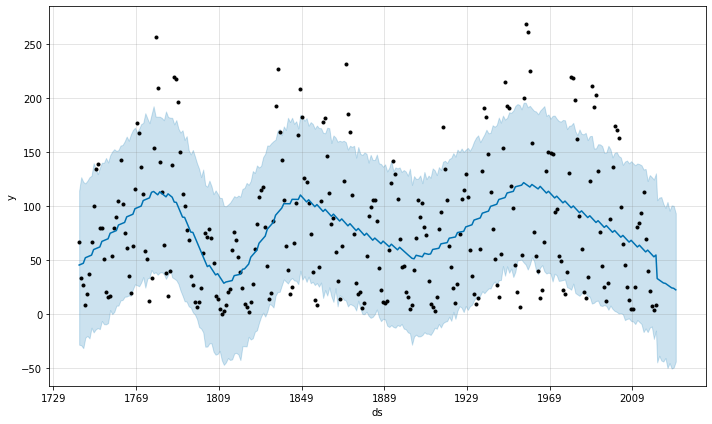

In [130]:
plot_1 = mdl.plot(forecast)

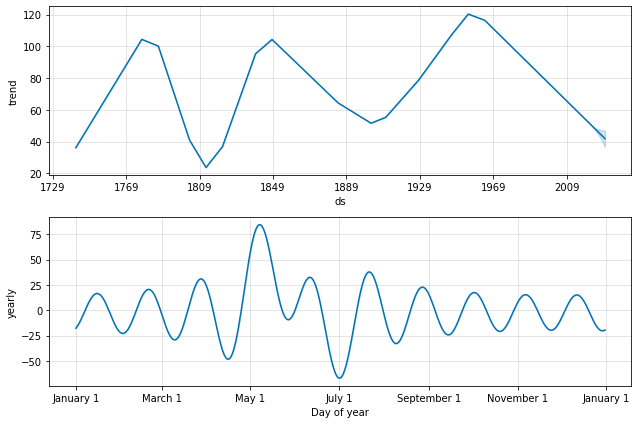

In [24]:
plot_2 = mdl.plot_components(forecast)

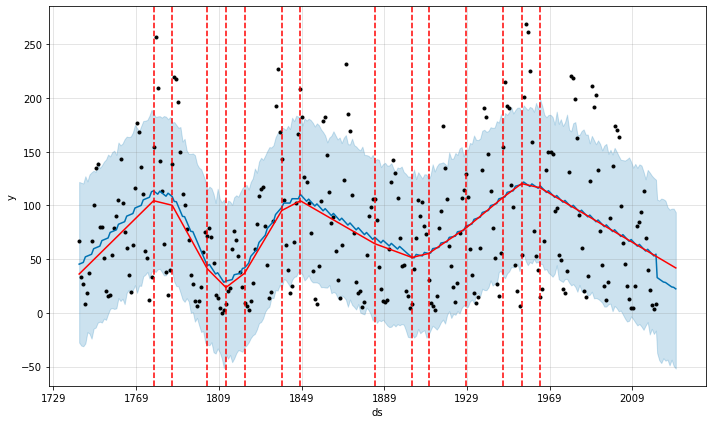

In [25]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast,plot_cap=True, uncertainty=True)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Cross Validation

In [26]:
from fbprophet.diagnostics import cross_validation

In [27]:
YR_CV = cross_validation(mdl, initial='97000 days',period='180 days', horizon='365 days')
YR_CV.head()

INFO:fbprophet:Making 26 forecasts with cutoffs between 2007-02-05 00:00:00 and 2019-06-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-06-01,91.463375,17.693049,163.918205,12.6,2007-02-05
1,2008-06-01,91.274251,16.142843,164.601259,4.2,2007-08-04
2,2008-06-01,91.274251,15.818717,166.374026,4.2,2008-01-31
3,2009-06-01,81.822679,12.809994,157.616447,4.8,2008-07-29
4,2009-06-01,81.822679,10.605427,155.484137,4.8,2009-01-25


In [28]:
from fbprophet.diagnostics import performance_metrics

In [29]:
YR_PM = performance_metrics(YR_CV)
YR_PM.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,122 days,6900.678513,83.070323,82.968813,13.495481,13.495481,0.0
1,127 days,6757.209074,82.202245,82.048465,18.389178,18.389178,0.0
2,132 days,4157.060634,64.475271,62.912304,9.003154,9.003154,0.5
3,137 days,1290.702459,35.926348,31.468083,1.067423,1.067423,1.0
4,143 days,194.769672,13.955991,13.954837,0.168976,0.168976,1.0


In [30]:
from fbprophet.plot import plot_cross_validation_metric

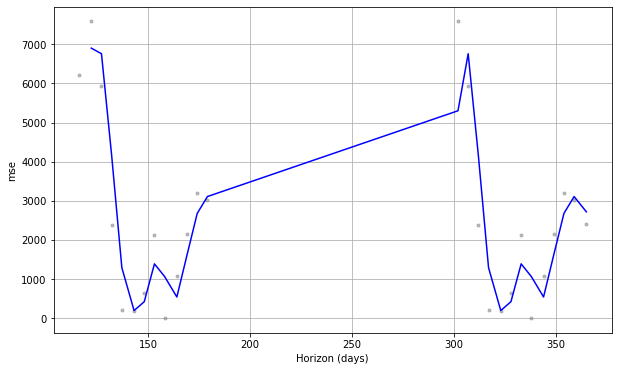

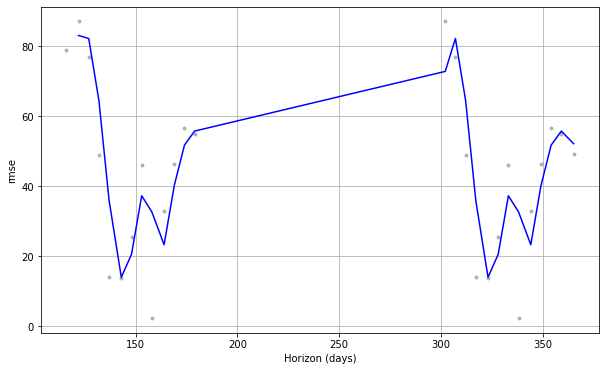

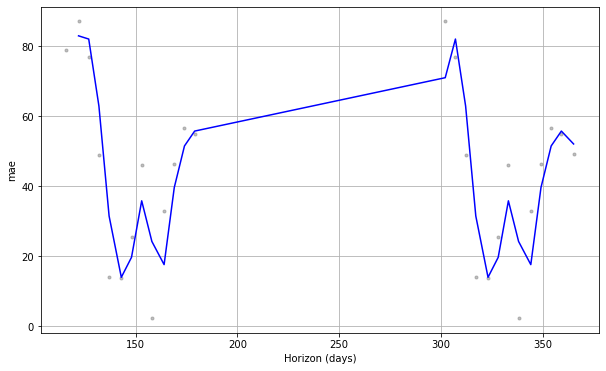

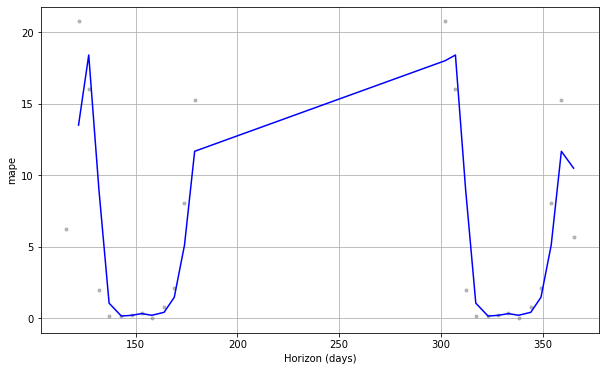

In [31]:
plt_mse = plot_cross_validation_metric(YR_CV ,metric='mse')
plt_rmse = plot_cross_validation_metric(YR_CV ,metric='rmse')
plt_mae = plot_cross_validation_metric(YR_CV ,metric='mae')
plt_mape = plot_cross_validation_metric(YR_CV ,metric='mape')

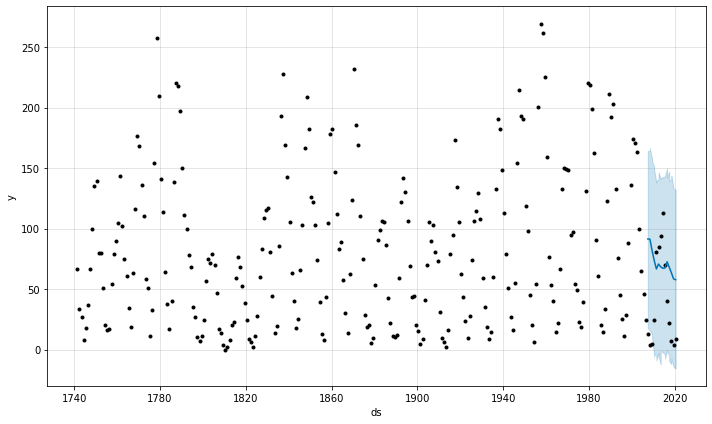

In [32]:
plot_3 = mdl.plot(YR_CV)

In [33]:
r2_yr = r2_score(YR_CV['y'],YR_CV['yhat'])

In [34]:
r2_yr

-0.7218003353357954

# Finding the outliers using IQR

In [35]:
Q1 = np.percentile(YR['y'], 25)
Q2 = np.percentile(YR['y'], 50)
Q3 = np.percentile(YR['y'], 75)
print(Q1)
print(Q2)
print(Q3)

24.849999999999998
68.3
116.57499999999999


In [36]:
from scipy import stats

In [37]:
IQR = stats.iqr(YR['y'])
IQR

91.725

In [38]:
low_lim = Q1 - 1.5 * IQR  # LOWER LIMIT
upr_lim = Q3 + 1.5 * IQR  # UPPER LIMIT
print(low_lim)
print(upr_lim)

-112.73749999999998
254.16249999999997


In [39]:
outlier = []
for i in YR['y']:
    if ((i>upr_lim or i<low_lim)):
        outlier.append(i)
print('These are the outliers we\'re looking for:', outlier)
print('The number of outliers present are:', len(outlier))

These are the outliers we're looking for: [257.3, 269.3, 261.7]
The number of outliers present are: 3


<AxesSubplot:xlabel='y'>

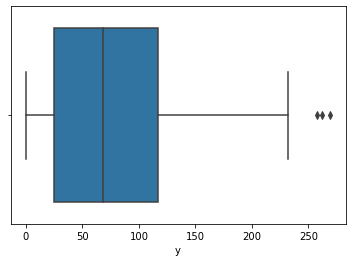

In [40]:
sb.boxplot(YR['y'])

# LOGISTIC

# 10 Years

In [41]:
yearly_lg = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Year.csv', sep=';')
yearly_lg.columns = ['Decimal Year','sunspot number','standard deviation','observations','indicator']

In [42]:
yearly_lg['Decimal Year'] = yearly_lg['Decimal Year'].apply(np.int64)

In [43]:
yearly_lg['Decimal Year'] = (yearly_lg['Decimal Year']).astype(str)

In [44]:
yearly_lg['Decimal Year'] = yearly_lg['Decimal Year'] + "-06-01"

In [45]:
YR_lg = yearly_lg.drop(yearly.index[:40], axis=0) # axis=0 means every row.

In [46]:
YR_lg.reset_index(drop=True, inplace=True)

In [47]:
YR_lg['Decimal Year'] = pd.to_datetime(YR_lg['Decimal Year'], infer_datetime_format=True, format='%Y/%m/%d')

In [48]:
YR_lg.drop(['standard deviation','observations','indicator'],axis=1,inplace=True)

In [49]:
YR_lg.columns=['ds','y']

In [50]:
YR_lg.head()

,ds,y
0,1741-06-01,66.7
1,1742-06-01,33.3
2,1743-06-01,26.7
3,1744-06-01,8.3
4,1745-06-01,18.3


In [51]:
m_lg = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=5,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [52]:
m_lg.add_seasonality(name = 'full year', period = 365, fourier_order = 7, prior_scale=0.5)

In [53]:
Cap = YR_lg['y'].quantile(0.95)
YR_lg['cap'] = Cap

Floor =YR_lg['y'].quantile(0.05)          #Cap and floor needs to be set for logistic
YR_lg['floor'] = Floor

mdl_lg = m_lg.fit(YR_lg)

In [54]:
future_lg = m_lg.make_future_dataframe(periods = 10, freq = 'y')
future_lg['cap'] = Cap
future_lg['floor'] = Floor

forecast_lg = m_lg.predict(future_lg)

future_lg.head()

,ds,cap,floor
0,1741-06-01,203.55,6.99
1,1742-06-01,203.55,6.99
2,1743-06-01,203.55,6.99
3,1744-06-01,203.55,6.99
4,1745-06-01,203.55,6.99


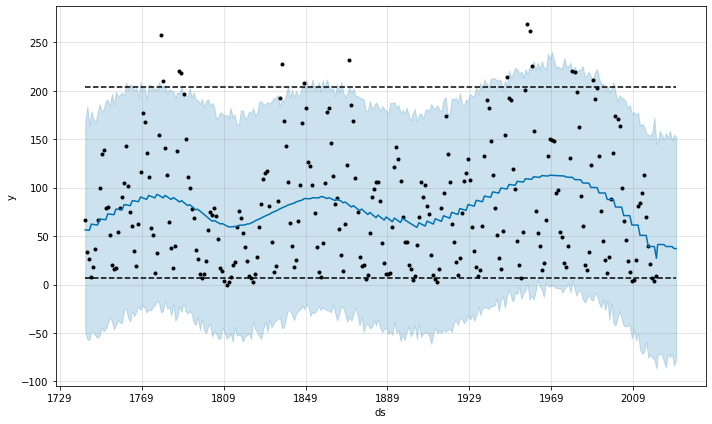

In [55]:
plot_4_lg = mdl_lg.plot(forecast_lg)

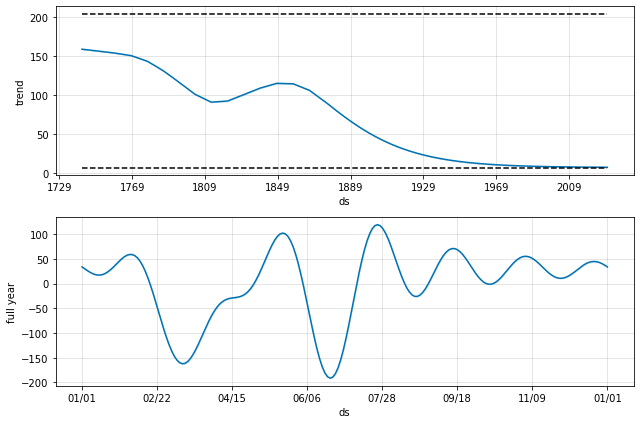

In [56]:
plot_5_lg = mdl_lg.plot_components(forecast_lg)

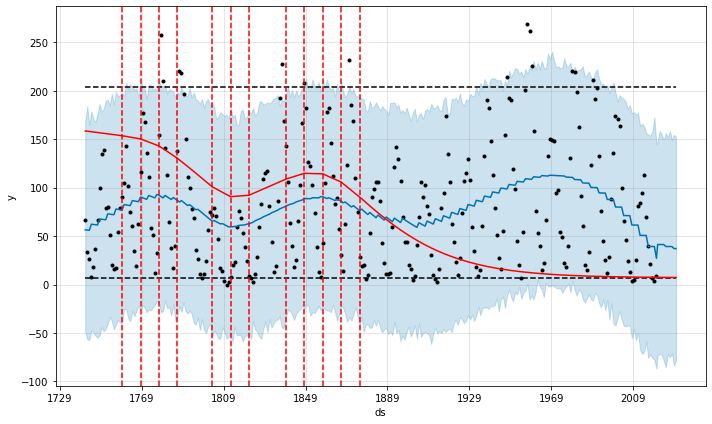

In [57]:
from fbprophet.plot import add_changepoints_to_plot
fig_2_lg = m_lg.plot(forecast_lg,plot_cap=True, uncertainty=True)
a_2_lg = add_changepoints_to_plot(fig_2_lg.gca(), m_lg, forecast_lg)

# Cross Validation 10_YR

In [58]:
from fbprophet.diagnostics import cross_validation

In [59]:
YR_CV_lg = cross_validation(mdl_lg, initial='97000 days',period='180 days', horizon='365 days')
YR_CV_lg.head()

INFO:fbprophet:Making 26 forecasts with cutoffs between 2007-02-05 00:00:00 and 2019-06-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-06-01,86.044020,-35.396814,191.318287,12.6,2007-02-05
1,2008-06-01,73.705136,-50.964318,193.711950,4.2,2007-08-04
2,2008-06-01,73.705136,-34.118896,188.503633,4.2,2008-01-31
3,2009-06-01,66.174122,-49.357149,190.210875,4.8,2008-07-29
4,2009-06-01,66.174122,-38.347855,176.852136,4.8,2009-01-25


In [60]:
from fbprophet.diagnostics import performance_metrics

In [61]:
YR_PM_lg = performance_metrics(YR_CV_lg)
YR_PM_lg.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,122 days,5112.494038,71.501707,71.474578,11.188866,11.188866,1.0
1,127 days,4298.873421,65.565795,65.439629,14.667559,14.667559,1.0
2,132 days,2506.463728,50.064596,48.337448,7.101989,7.101989,1.0
3,137 days,901.370107,30.022826,29.446526,0.854843,0.854843,1.0
4,143 days,877.468087,29.622088,29.104667,0.350826,0.350826,1.0


In [62]:
from fbprophet.plot import plot_cross_validation_metric

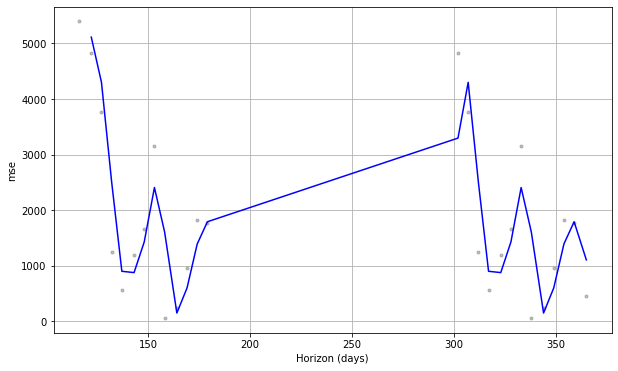

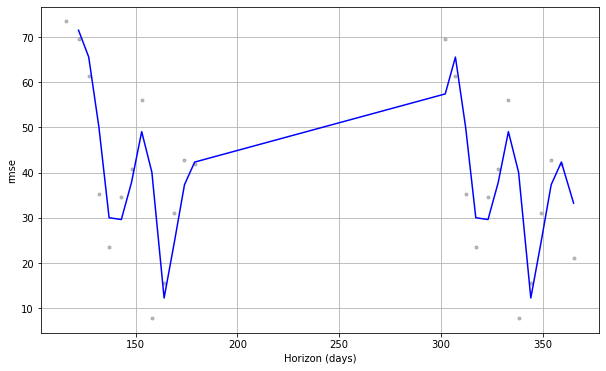

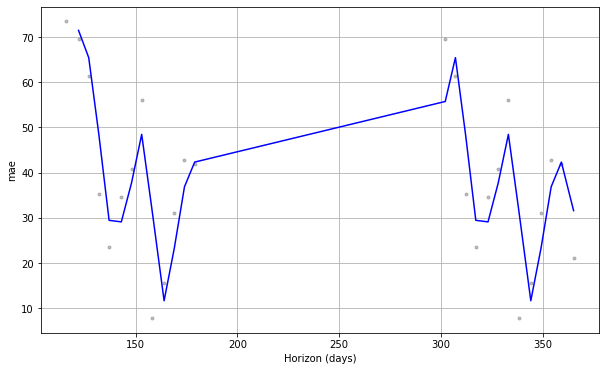

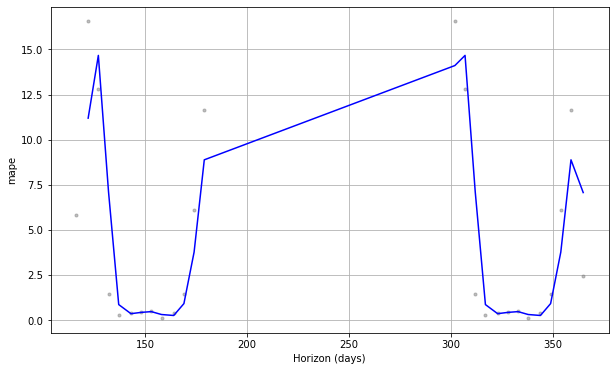

In [63]:
plt_mse_10lg = plot_cross_validation_metric(YR_CV_lg ,metric='mse')
plt_rmse_10lg = plot_cross_validation_metric(YR_CV_lg ,metric='rmse')
plt_mae_10lg = plot_cross_validation_metric(YR_CV_lg ,metric='mae')
plt_mape_10lg = plot_cross_validation_metric(YR_CV_lg ,metric='mape')

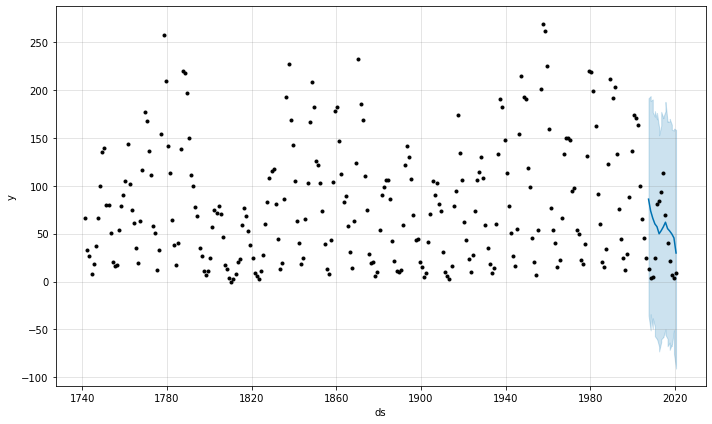

In [64]:
plot_6_lg = mdl.plot(YR_CV_lg)

In [65]:
r2_10yr = r2_score(YR_CV_lg['y'],YR_CV_lg['yhat'])

In [66]:
r2_10yr

-0.2681593689776889

# 20 Years

In [6]:
yearly_lg_20 = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Year.csv', sep=';')
yearly_lg_20.columns = ['Decimal Year','sunspot number','standard deviation','observations','indicator']

In [17]:
yearly_lg_20

,Decimal Year,sunspot number,standard deviation,observations,indicator
0,1701-06-01,18.3,-1.0,-1,1
1,1702-06-01,26.7,-1.0,-1,1
2,1703-06-01,38.3,-1.0,-1,1
3,1704-06-01,60.0,-1.0,-1,1
4,1705-06-01,96.7,-1.0,-1,1
...,...,...,...,...,...
315,2016-06-01,39.8,3.9,9940,1
316,2017-06-01,21.7,2.5,11444,1
317,2018-06-01,7.0,1.1,12611,1
318,2019-06-01,3.6,0.5,12884,1


In [7]:
yearly_lg_20['Decimal Year'] = yearly_lg_20['Decimal Year'].apply(np.int64)

In [8]:
yearly_lg_20['Decimal Year'] = (yearly_lg_20['Decimal Year']).astype(str)

In [9]:
yearly_lg_20['Decimal Year'] = yearly_lg_20['Decimal Year'] + "-06-01"

In [10]:
YR_lg_20 = yearly_lg_20.drop(yearly_lg_20.index[:50], axis=0) # axis=0 means every row.

In [11]:
YR_lg_20.reset_index(drop=True, inplace=True)

In [12]:
YR_lg_20['Decimal Year'] = pd.to_datetime(YR_lg_20['Decimal Year'], infer_datetime_format=True, format='%Y/%m/%d')

In [13]:
YR_lg_20.drop(['standard deviation','observations','indicator'],axis=1,inplace=True)

In [14]:
YR_lg_20.columns=['ds','y']

In [16]:
YR_lg_20.head()

,ds,y
0,1751-06-01,79.5
1,1752-06-01,79.7
2,1753-06-01,51.2
3,1754-06-01,20.3
4,1755-06-01,16.0


In [15]:
YR_lg_20.tail()

,ds,y
265,2016-06-01,39.8
266,2017-06-01,21.7
267,2018-06-01,7.0
268,2019-06-01,3.6
269,2020-06-01,8.6


In [76]:
m_lg_20 = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_range=0.8,
            changepoint_prior_scale=5,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [77]:
m_lg_20.add_seasonality(name = 'full year', period = 365, fourier_order = 7,mode = 'additive`' ,prior_scale=0.5)

In [78]:
Cap = YR_lg_20['y'].quantile(0.95)
YR_lg_20['cap'] = Cap

Floor =YR_lg_20['y'].quantile(0.05)
YR_lg_20['floor'] = Floor

mdl_lg_20 = m_lg_20.fit(YR_lg_20)

In [79]:
future_lg_20 = m_lg_20.make_future_dataframe(periods = 20, freq = 'y', include_history=True)
future_lg_20['cap'] = Cap
future_lg_20['floor'] = Floor

forecast_lg_20 = m_lg_20.predict(future_lg_20)

future_lg_20.head()


############### ERROR FOR 20 YEARS #########################
# OverflowError                             Traceback (most recent call last)
# <ipython-input-69-9b3f655cfdff> in <module>
#       3 future_lg_20['floor'] = Floor
#       4 
# ----> 5 forecast_lg_20 = m_lg_20.predict(future_lg_20)
#       6 
#       7 future_lg_20.head()

,ds,cap,floor
0,1751-06-01,206.05,6.89
1,1752-06-01,206.05,6.89
2,1753-06-01,206.05,6.89
3,1754-06-01,206.05,6.89
4,1755-06-01,206.05,6.89


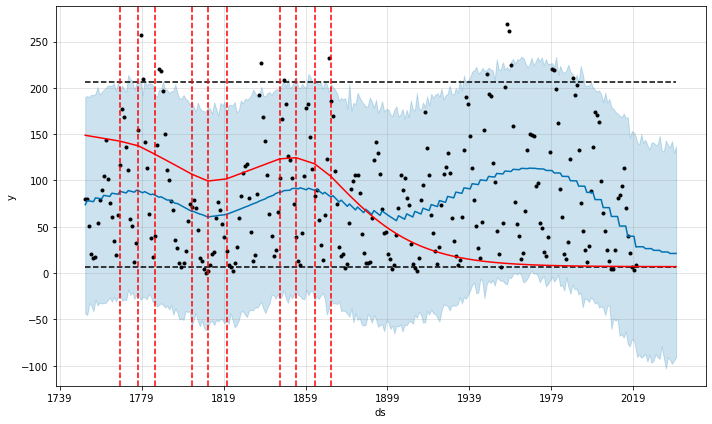

In [80]:
from fbprophet.plot import add_changepoints_to_plot
fig_4_lg_20 = m_lg_20.plot(forecast_lg_20, plot_cap=True,uncertainty=True)
a_4_lg_20 = add_changepoints_to_plot(fig_4_lg_20.gca(), m_lg_20, forecast_lg_20)

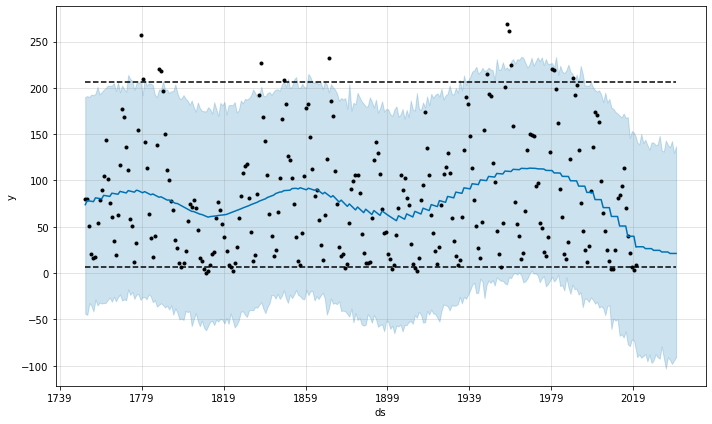

In [81]:
plot_7_lg_20 = m_lg_20.plot(forecast_lg_20)

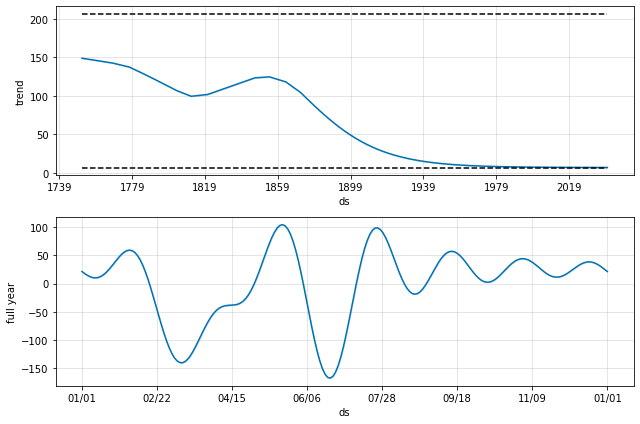

In [82]:
plot_8_lg_20 = mdl_lg_20.plot_components(forecast_lg_20)

# Cross Validation 20_YR

In [83]:
from fbprophet.diagnostics import cross_validation

In [84]:
YR_CV_lg_20 = cross_validation(mdl_lg_20, initial='93000 days',period='182 days', horizon='365 days',parallel = 'processes')
YR_CV_lg_20.head()

INFO:fbprophet:Making 27 forecasts with cutoffs between 2006-06-18 00:00:00 and 2019-06-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002272B1C20A0>


KeyboardInterrupt: 

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
YR_PM_lg_20 = performance_metrics(YR_CV_lg_20)
YR_PM_lg_20.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
plt_mse_20lg = plot_cross_validation_metric(YR_CV_lg_20 ,metric='mse')
plt_rmse_20lg = plot_cross_validation_metric(YR_CV_lg_20 ,metric='rmse')
plt_mae_20lg = plot_cross_validation_metric(YR_CV_lg_20 ,metric='mae')
plt_mape_20lg = plot_cross_validation_metric(YR_CV_lg_20 ,metric='mape')

In [ ]:
plot_9_lg_20 = mdl_lg_20.plot(YR_CV_lg_20)

In [ ]:
r2_20yr = r2_score(YR_CV_lg_20['y'],YR_CV_lg_20['yhat'])

In [ ]:
r2_20yr

# 1 YEAR

In [ ]:
yearly_lg_1 = pd.read_csv('C:/Users/prana/Desktop/CS_675_Proj_2/Year.csv', sep=';')
yearly_lg_1.columns = ['Decimal Year','sunspot number','standard deviation','observations','indicator']

In [ ]:
yearly_lg_1['Decimal Year'] = yearly_lg_1['Decimal Year'].apply(np.int64)

In [ ]:
yearly_lg_1['Decimal Year'] = (yearly_lg_1['Decimal Year']).astype(str)

In [ ]:
yearly_lg_1['Decimal Year'] = yearly_lg_1['Decimal Year'] + "-06-01"

In [ ]:
YR_lg_1 = yearly_lg_1.drop(yearly_lg_20.index[:30], axis=0) # axis=0 means every row.

In [ ]:
YR_lg_1.reset_index(drop=True, inplace=True)

In [ ]:
YR_lg_1['Decimal Year'] = pd.to_datetime(YR_lg_1['Decimal Year'], infer_datetime_format=True, format='%Y/%m/%d')

In [ ]:
YR_lg_1.drop(['standard deviation','observations','indicator'],axis=1,inplace=True)

In [ ]:
YR_lg_1.columns=['ds','y']

In [ ]:
m_lg_1 = Prophet(growth = 'logistic',
            n_changepoints=25,
            changepoint_prior_scale=5,
            interval_width = 0.95,
            seasonality_mode='additive',
            seasonality_prior_scale=20,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
           )

In [ ]:
m_lg_1.add_seasonality(name = 'full year', period = 365, fourier_order = 7, prior_scale=0.5)

In [ ]:
Cap = YR_lg_1['y'].quantile(0.95)
YR_lg_1['cap'] = Cap

Floor =YR_lg_1['y'].quantile(0.05)
YR_lg_1['floor'] = Floor

mdl_lg_1 = m_lg_1.fit(YR_lg_1)

In [ ]:
future_lg_1 = m_lg_1.make_future_dataframe(periods = 1, freq = 'y')
future_lg_1['cap'] = Cap
future_lg_1['floor'] = Floor

forecast_lg_1 = m_lg_1.predict(future_lg_1)

future_lg_1.head()

In [ ]:
plot_10_lg_1 = mdl_lg_1.plot(forecast_lg_1)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig_5_lg_1 = m_lg_1.plot(forecast_lg_1,xlabel = 'ds', ylabel ='y',plot_cap=True,uncertainty=True,)
a_5_lg_1 = add_changepoints_to_plot(fig_5_lg_1.gca(), m_lg_1, forecast_lg_1)

In [ ]:
plot_11_lg_1 = mdl_lg_1.plot_components(forecast_lg_1)

# Cross Validation 1_YR

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
YR_CV_lg_1 = cross_validation(mdl_lg_1, initial='99850 days',period='182 days', horizon='365 days')
YR_CV_lg_1.head()

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
YR_PM_lg_1 = performance_metrics(YR_CV_lg_1)
YR_PM_lg_1.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
plt_mse_1lg = plot_cross_validation_metric(YR_CV_lg_1 ,metric='mse')
plt_rmse_1lg = plot_cross_validation_metric(YR_CV_lg_1 ,metric='rmse')
plt_mae_1lg = plot_cross_validation_metric(YR_CV_lg_1 ,metric='mae')
plt_mape_1lg = plot_cross_validation_metric(YR_CV_lg_1 ,metric='mape')

In [ ]:
plot_13_lg_1 = mdl_lg_1.plot(YR_CV_lg_1)

In [ ]:
r2_1yr = r2_score(YR_CV_lg_1['y'],YR_CV_lg_1['yhat'])

In [ ]:
r2_1yr